In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Company Dataset

In [3]:
df= pd.read_csv('Company_Data.csv')
df.head(6)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [5]:
#Data description

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

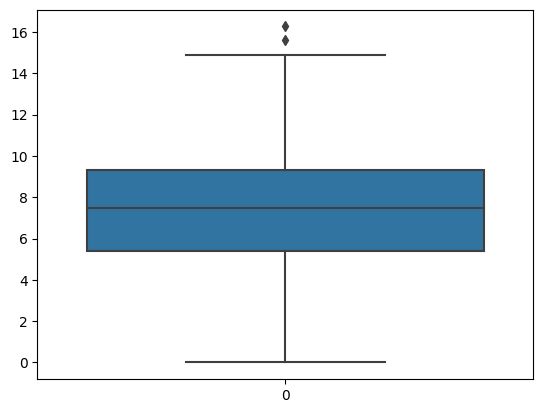

In [8]:
 sn= sns.boxplot(df['Sales'])

In [9]:
plt.rcParams['figure.dpi']=250

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


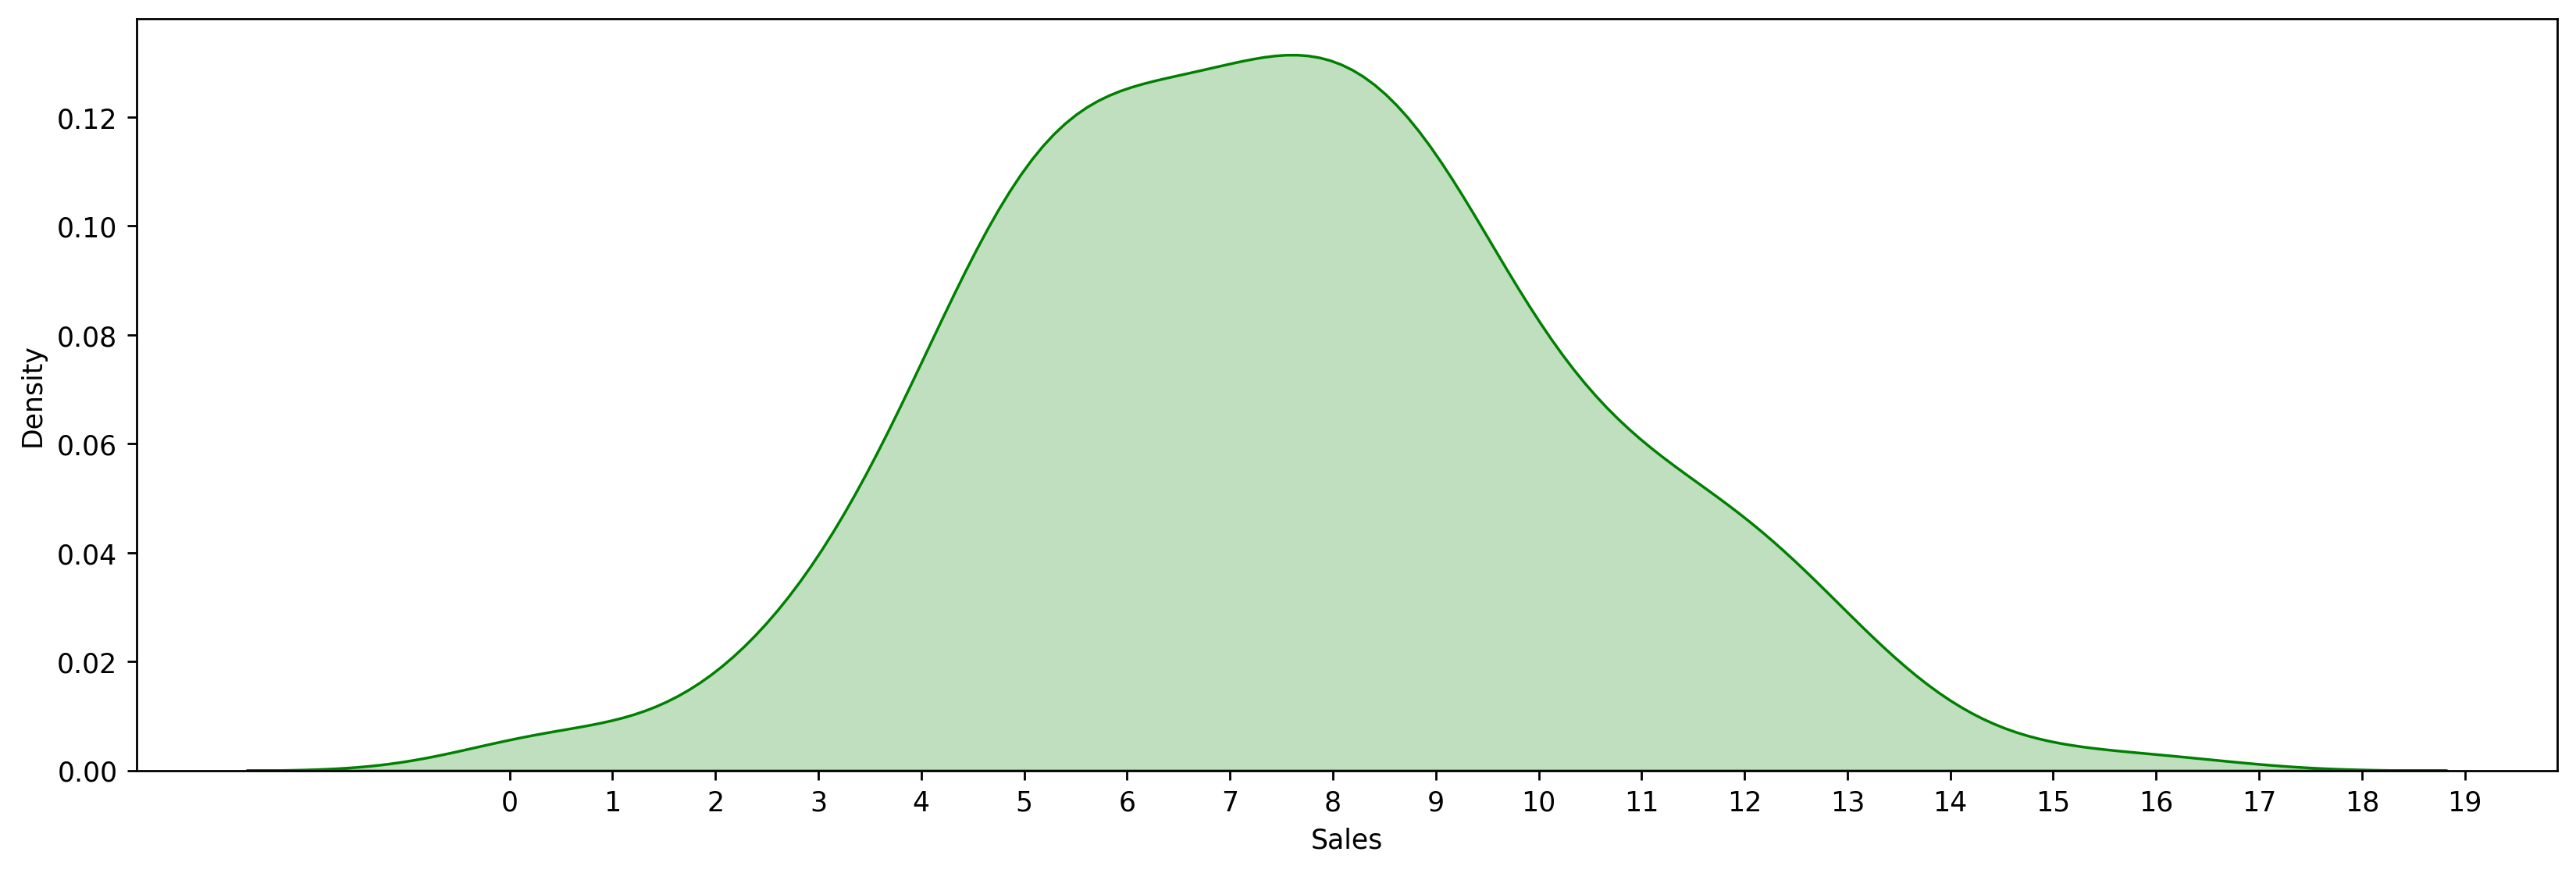

In [10]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['Sales'].skew()))
print("Kurtosis: {}".format(df['Sales'].kurtosis()))
ax = sns.kdeplot(df['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

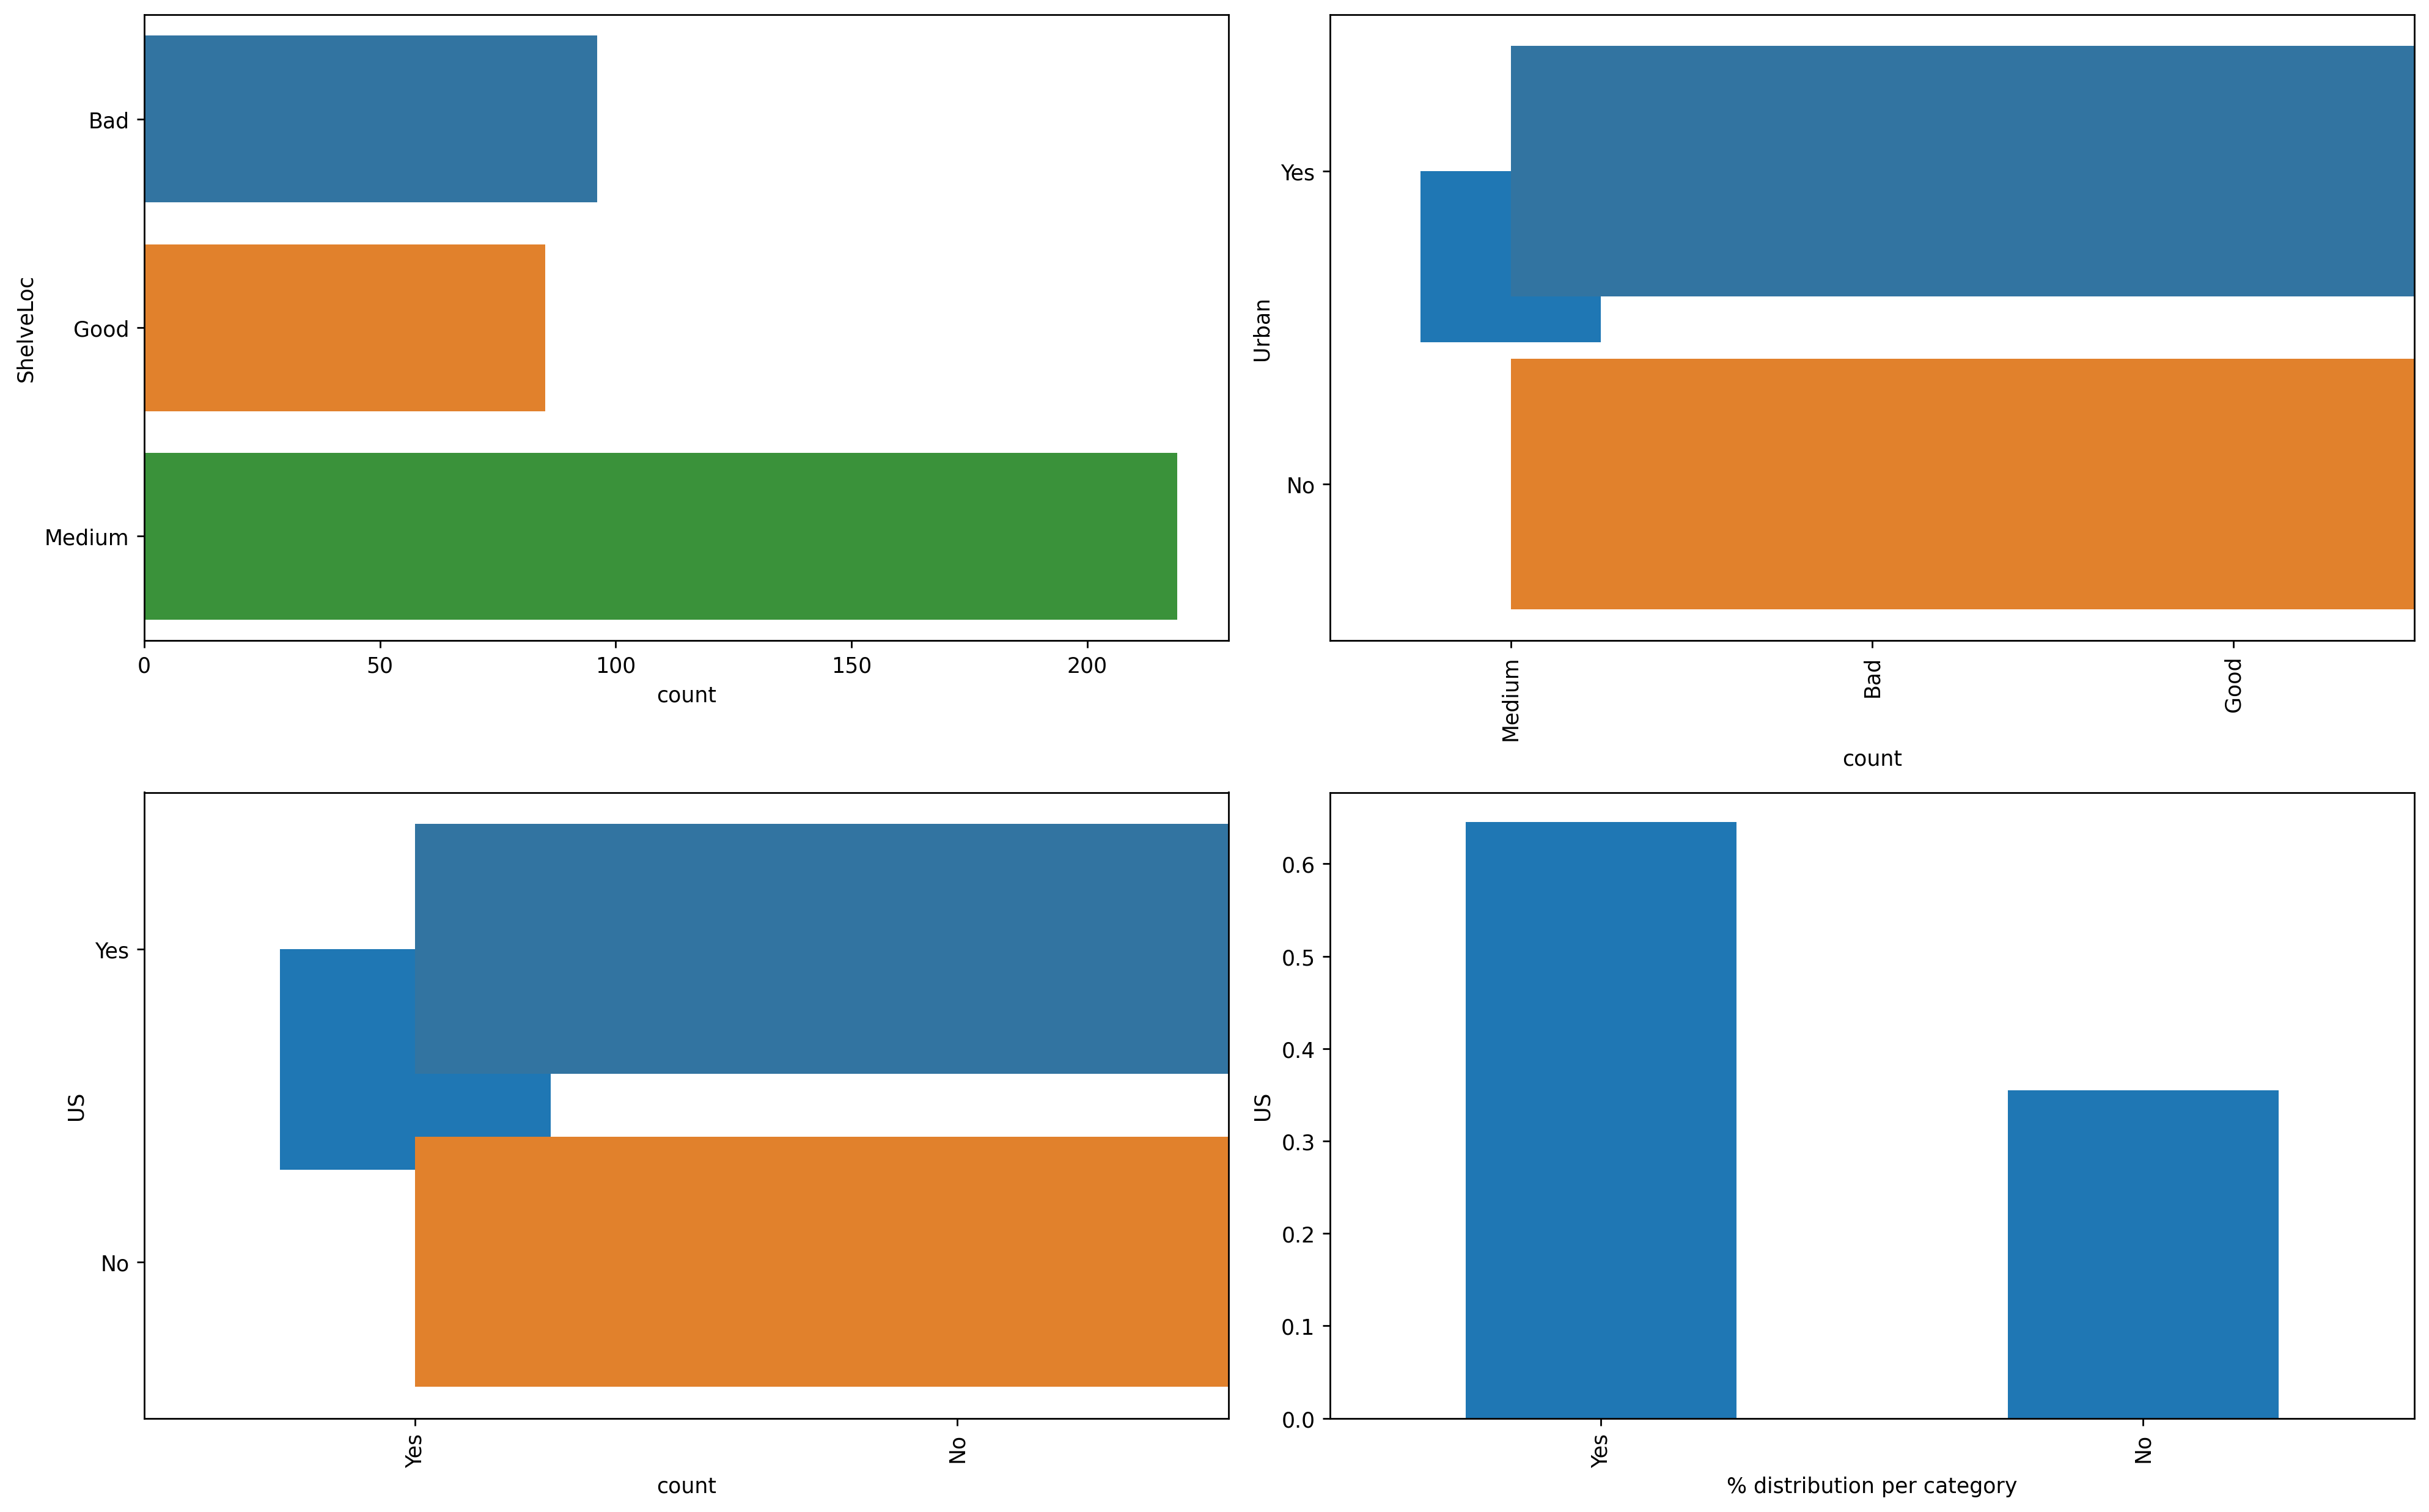

In [11]:
plt.figure(figsize=(16,10))
for i,col in enumerate(['ShelveLoc', 'Urban', 'US'],1):
    plt.subplot(2,2,i)
    sns.countplot(data=df,y=col)
    plt.subplot(2,2,i+1)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

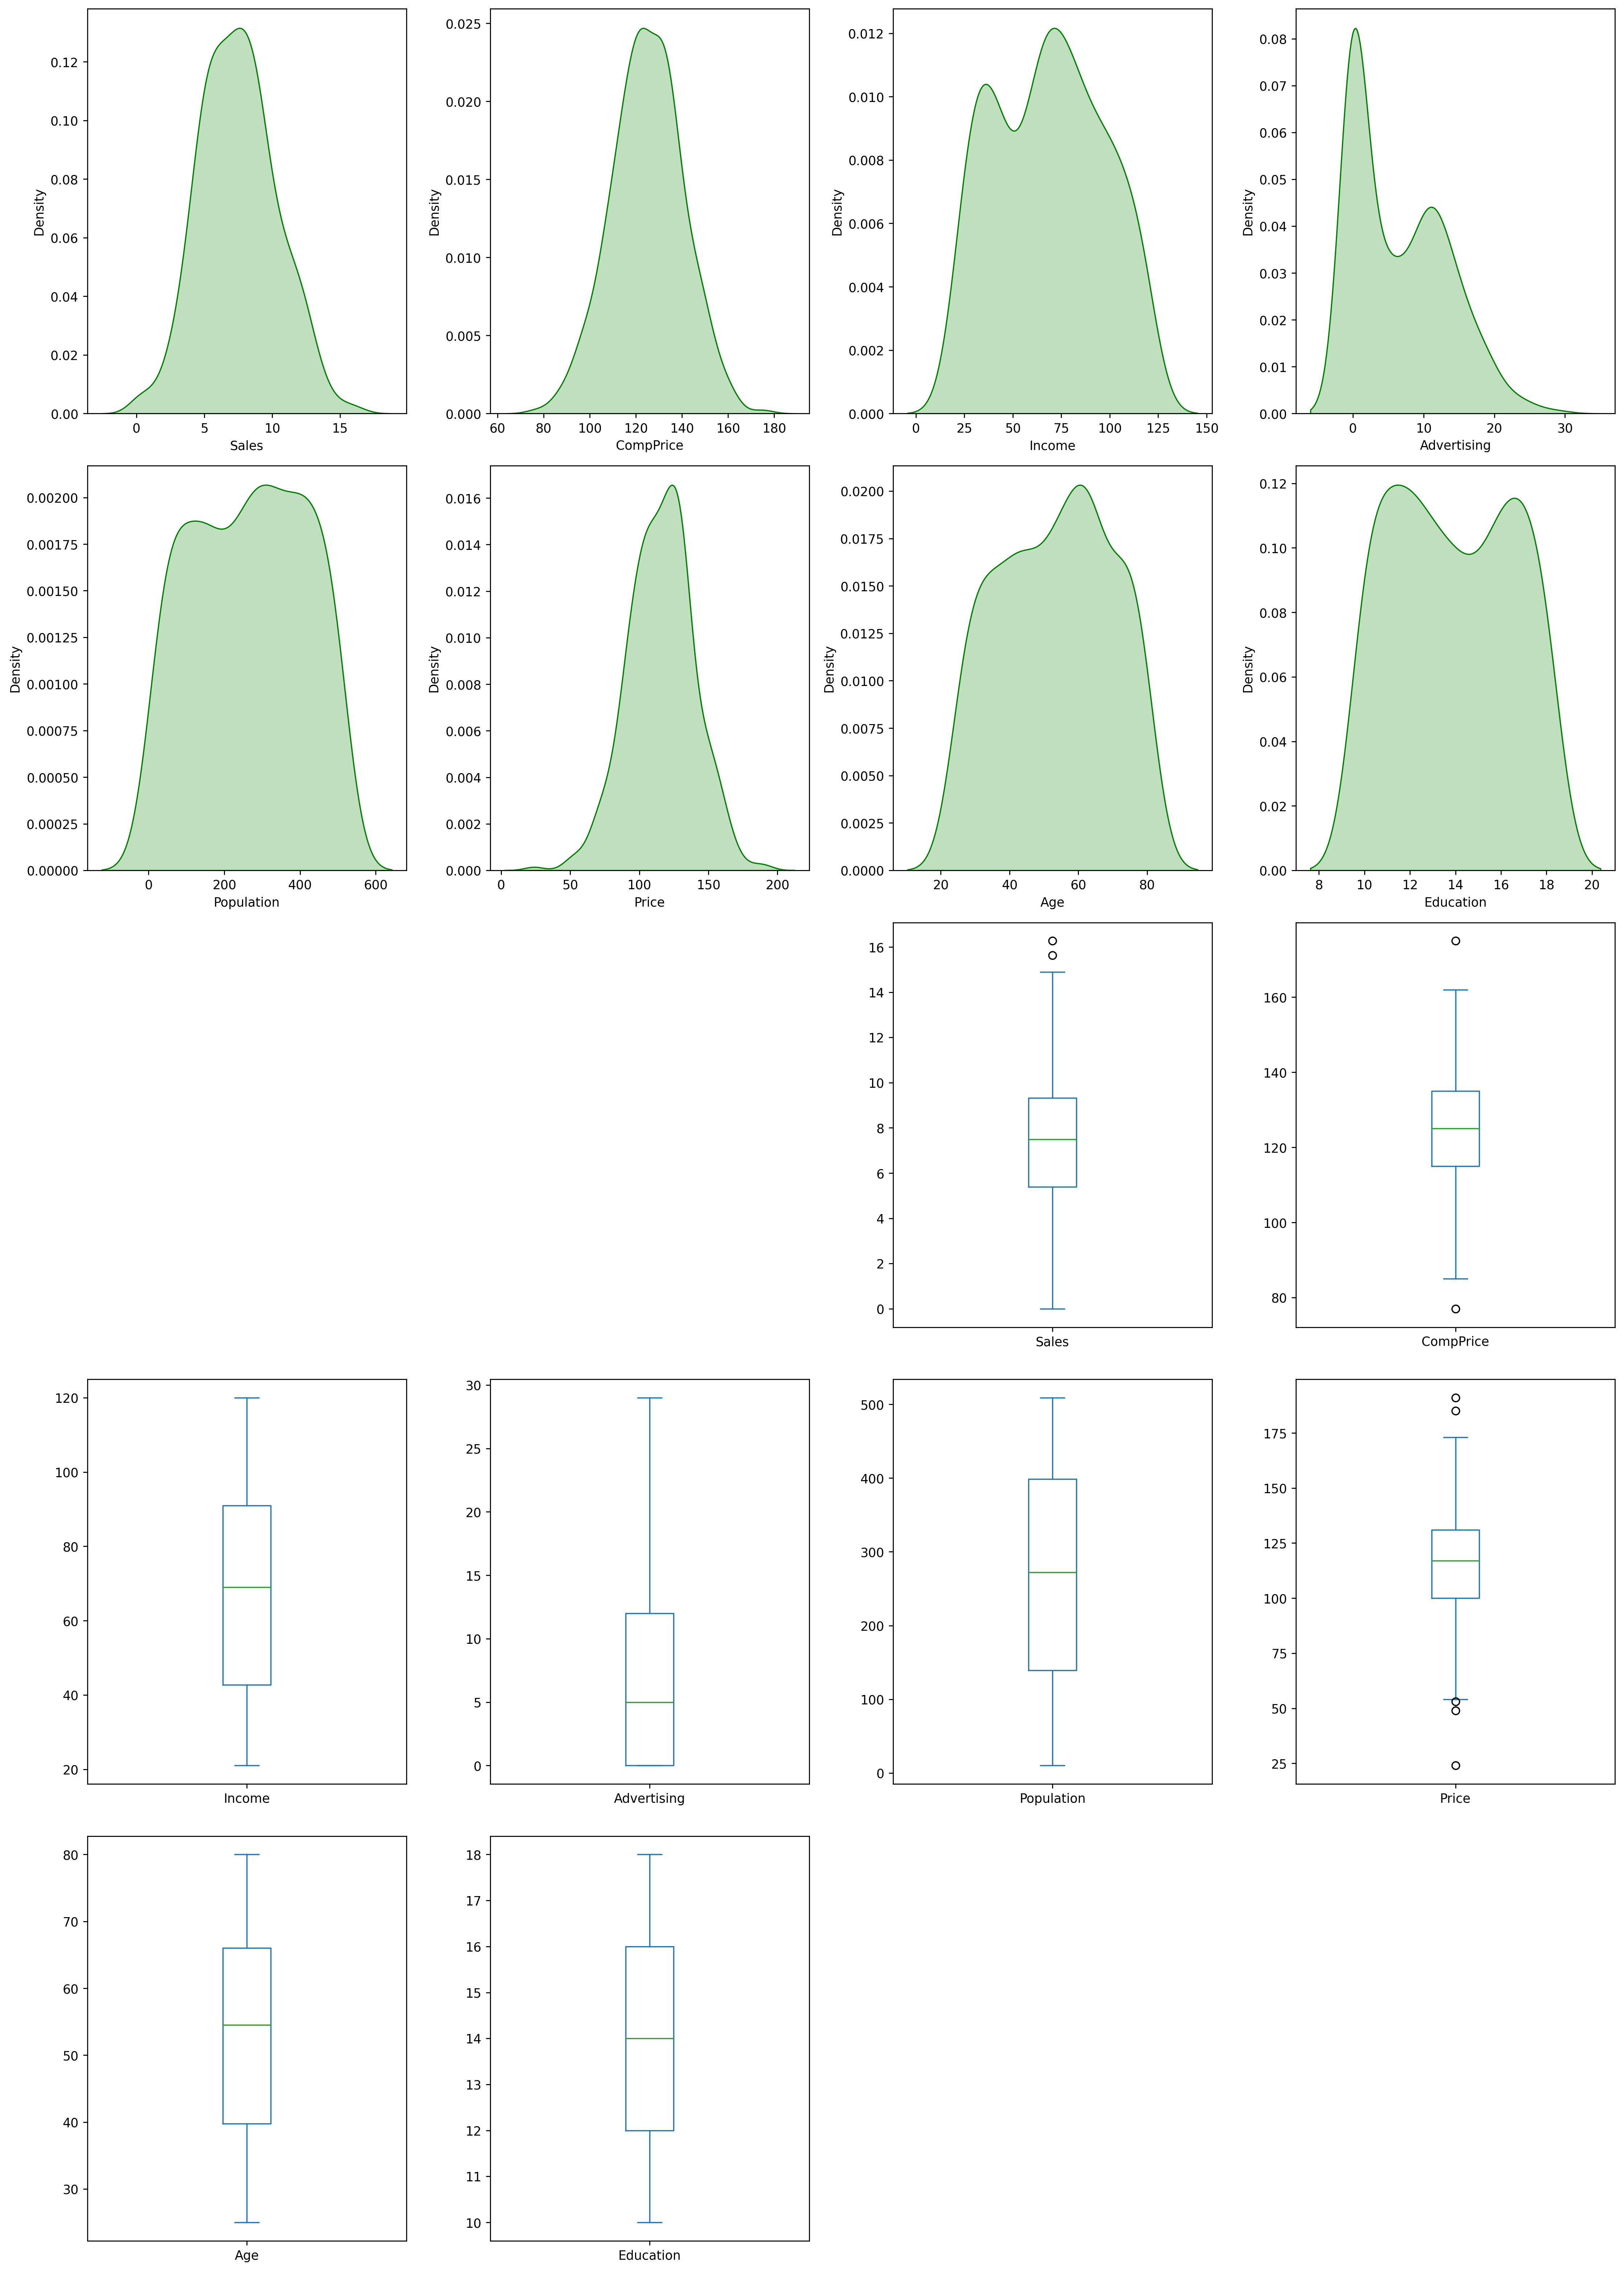

In [12]:
plt.figure(figsize=(18,40))
for i,col in enumerate(['Sales','CompPrice','Income','Advertising',
                        'Population','Price','Age','Education'],1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()

In [13]:
df['High']=df.Sales.map(lambda x: 1 if x > 7.49
                        else 0)
df.head(6)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes,1


In [14]:
le= LabelEncoder()

df['ShelveLoc'] = le.fit_transform(df['ShelveLoc'])
df['Urban'] = le.fit_transform(df['Urban'])
df['US'] = le.fit_transform(df['US'])

In [15]:
df.head(6)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
5,10.81,124,113,13,501,72,0,78,16,0,1,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
 11  High         400 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 37.6 KB


In [17]:
x= df.iloc[:,1:11]
y=df['High']

In [18]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [19]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: High, Length: 400, dtype: int64

In [20]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y,train_size=0.75, random_state=143)

In [21]:
rf= RandomForestClassifier(criterion='entropy')
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [22]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.73      0.90      0.80        48
           1       0.88      0.69      0.77        52

    accuracy                           0.79       100
   macro avg       0.80      0.79      0.79       100
weighted avg       0.81      0.79      0.79       100



In [23]:
print('Training accuracy: ', rf.score(xtrain,ytrain))
print('Testing Accuracy: ', rf.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.79


In [24]:
rf = RandomForestClassifier(criterion='gini')
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [25]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79        48
           1       0.85      0.67      0.75        52

    accuracy                           0.77       100
   macro avg       0.78      0.77      0.77       100
weighted avg       0.79      0.77      0.77       100



In [26]:
print('Training accuracy: ', rf.score(xtrain,ytrain))
print('Testing Accuracy: ', rf.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.77


# Hyperparameter Tunning

In [27]:
from sklearn.model_selection import GridSearchCV
rf= RandomForestClassifier()

param= {
    'criterion': ['gini','entropy'],
    'max_depth':[1,2,3,4,5,6] 
}

In [28]:
grid= GridSearchCV(RandomForestClassifier(),param)

In [29]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6]})

In [30]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [31]:
rf = RandomForestClassifier(criterion='entropy',max_depth=6, random_state=143)

rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [32]:
print('Training accuracy: ', rf.score(xtrain,ytrain))
print('Testing Accuracy: ', rf.score(xtest,ytest))

Training accuracy:  0.98
Testing Accuracy:  0.81


# Fraud Dataset

In [57]:
df= pd.read_csv('Fraud_check.csv')
df.head(6)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO


In [58]:
df.rename({'Marital.Status':'MS','Taxable.Income':'tax',
              'City.Population':'city_pop','Work.Experience':'Work'},inplace=True, axis=1)
df.head(6)

,Undergrad,MS,tax,city_pop,Work,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO


In [59]:
#Data description

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Undergrad  600 non-null    object
 1   MS         600 non-null    object
 2   tax        600 non-null    int64 
 3   city_pop   600 non-null    int64 
 4   Work       600 non-null    int64 
 5   Urban      600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [60]:
df.describe()

,tax,city_pop,Work
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [61]:
df.isna().sum()

Undergrad    0
MS           0
tax          0
city_pop     0
Work         0
Urban        0
dtype: int64

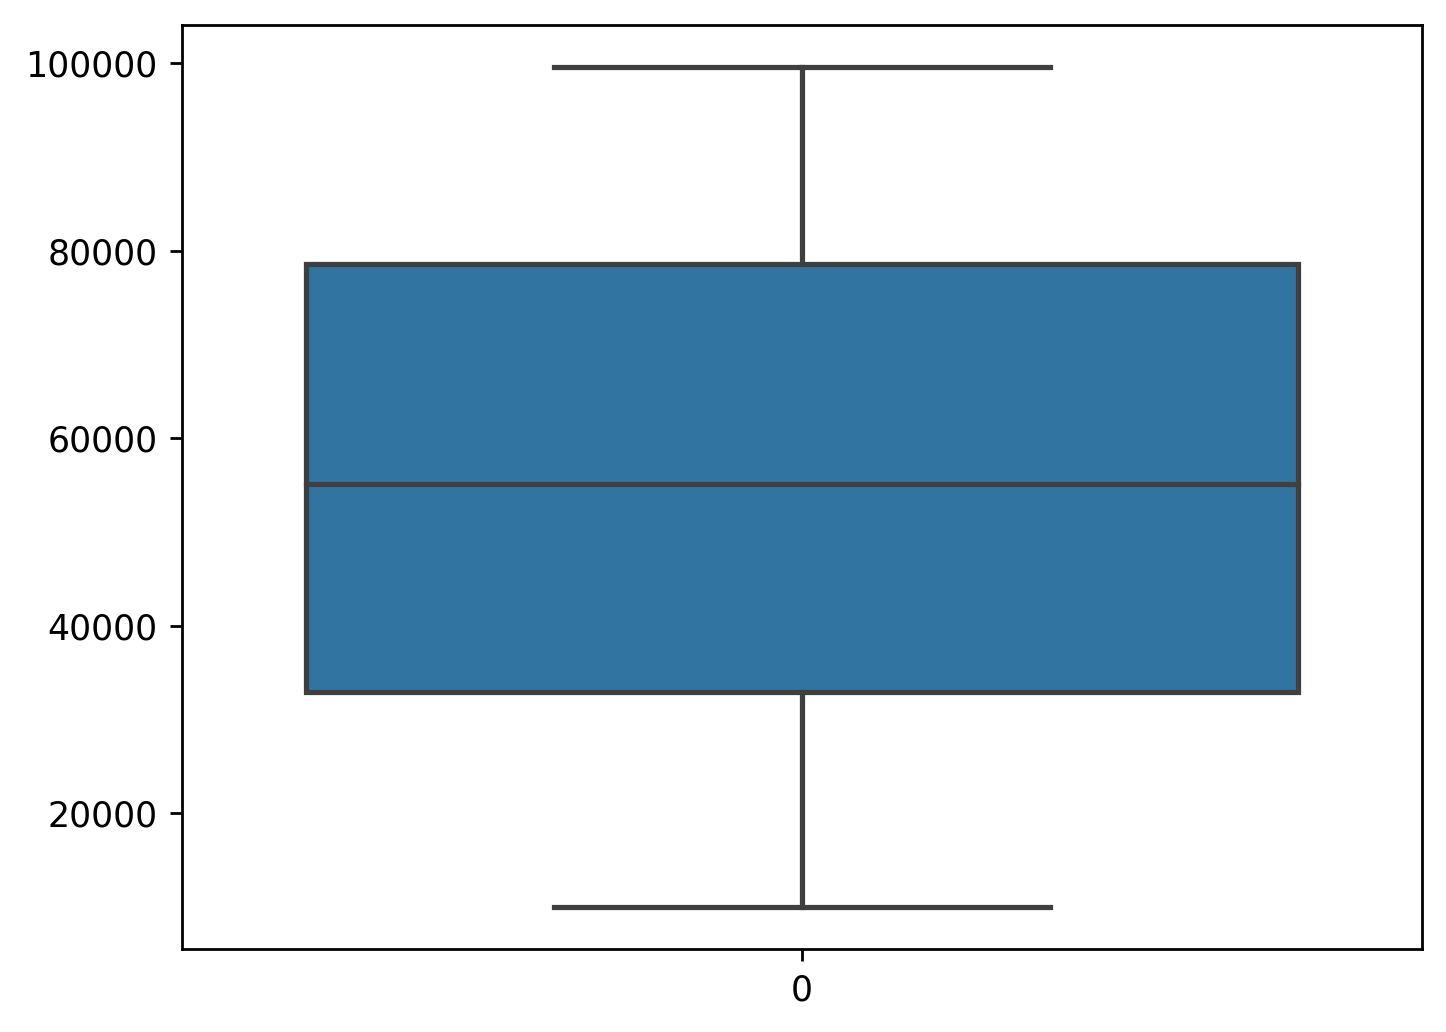

In [62]:
sn= sns.boxplot(df['tax'])

In [63]:
plt.rcParams['figure.dpi']=250

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


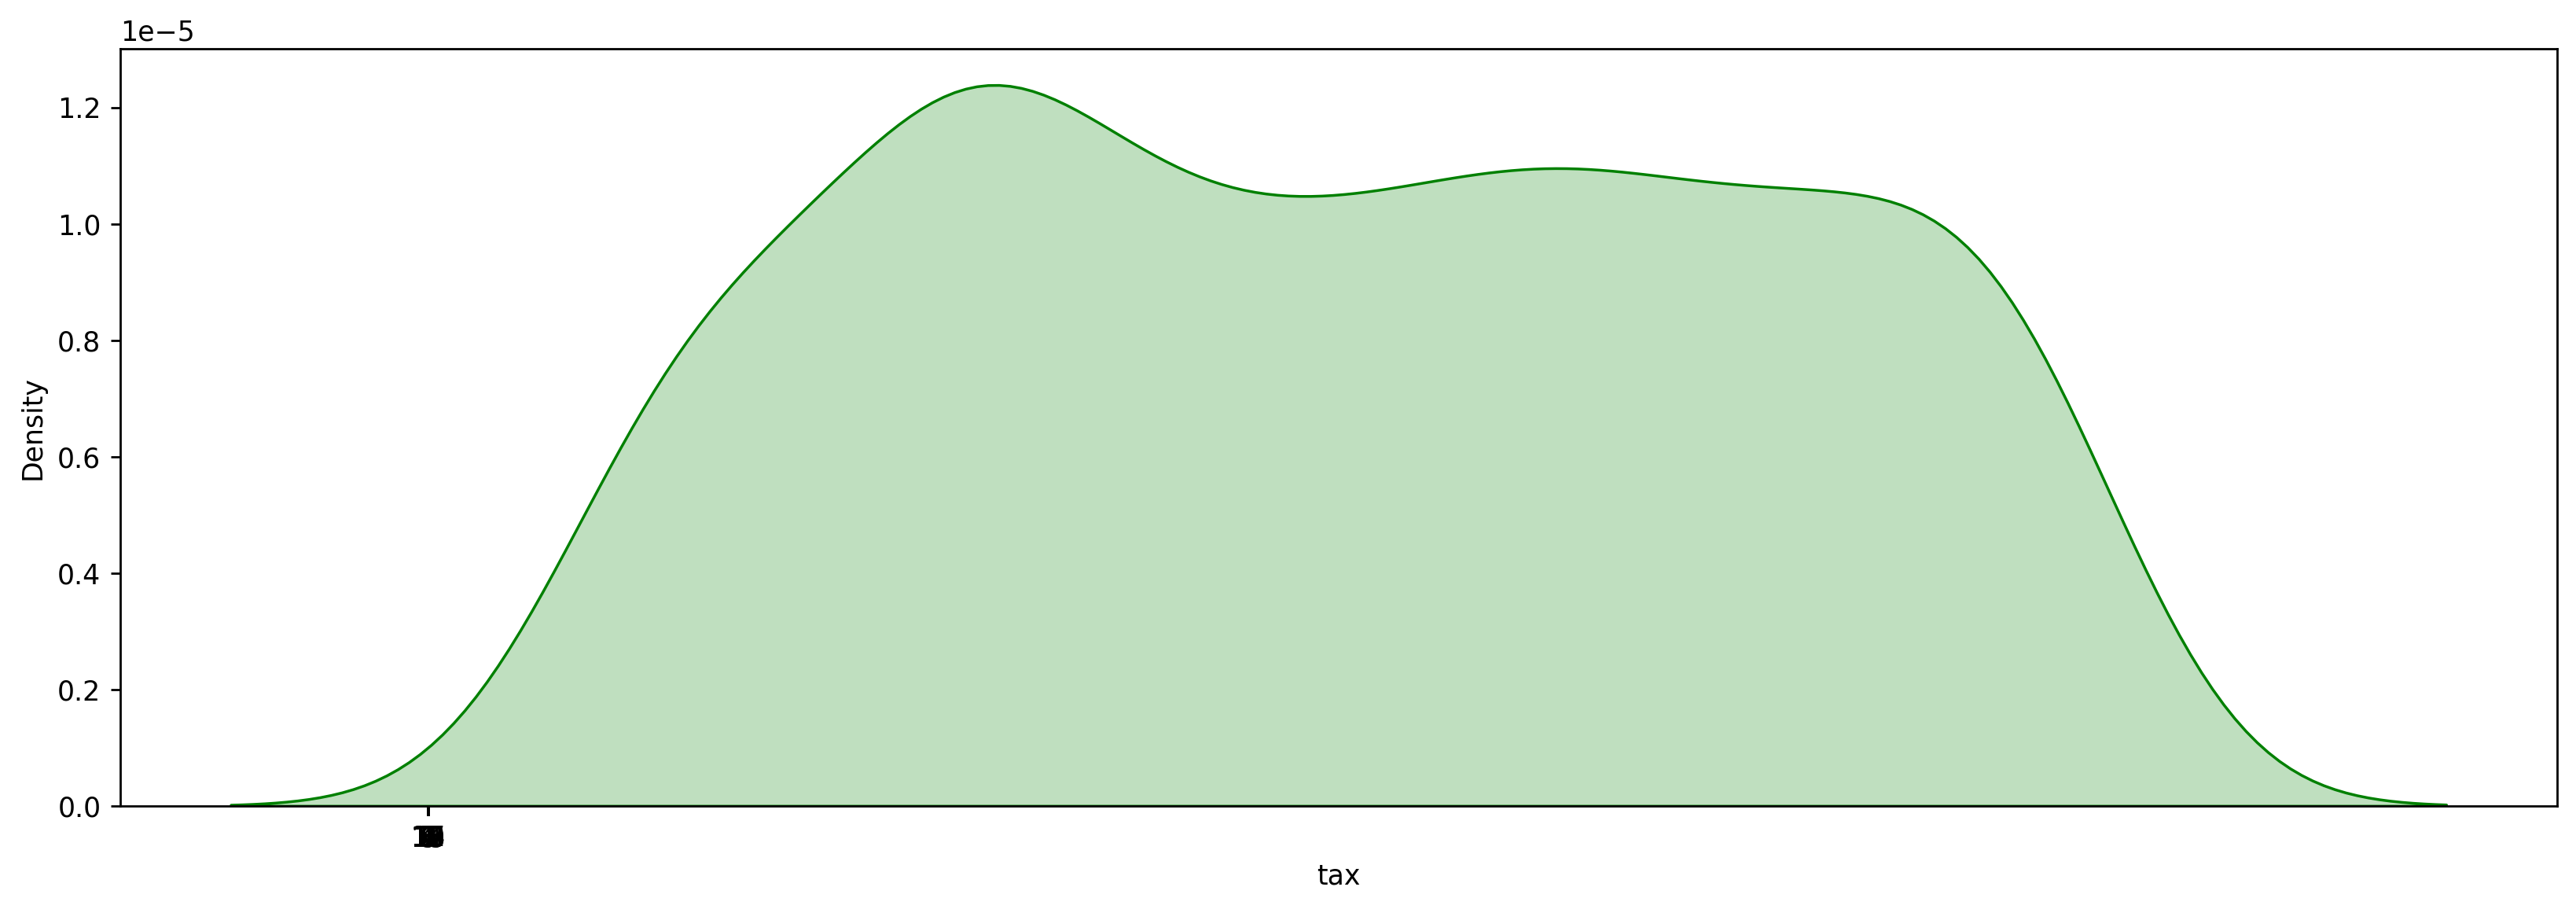

In [64]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['tax'].skew()))
print("Kurtosis: {}".format(df['tax'].kurtosis()))
ax = sns.kdeplot(df['tax'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

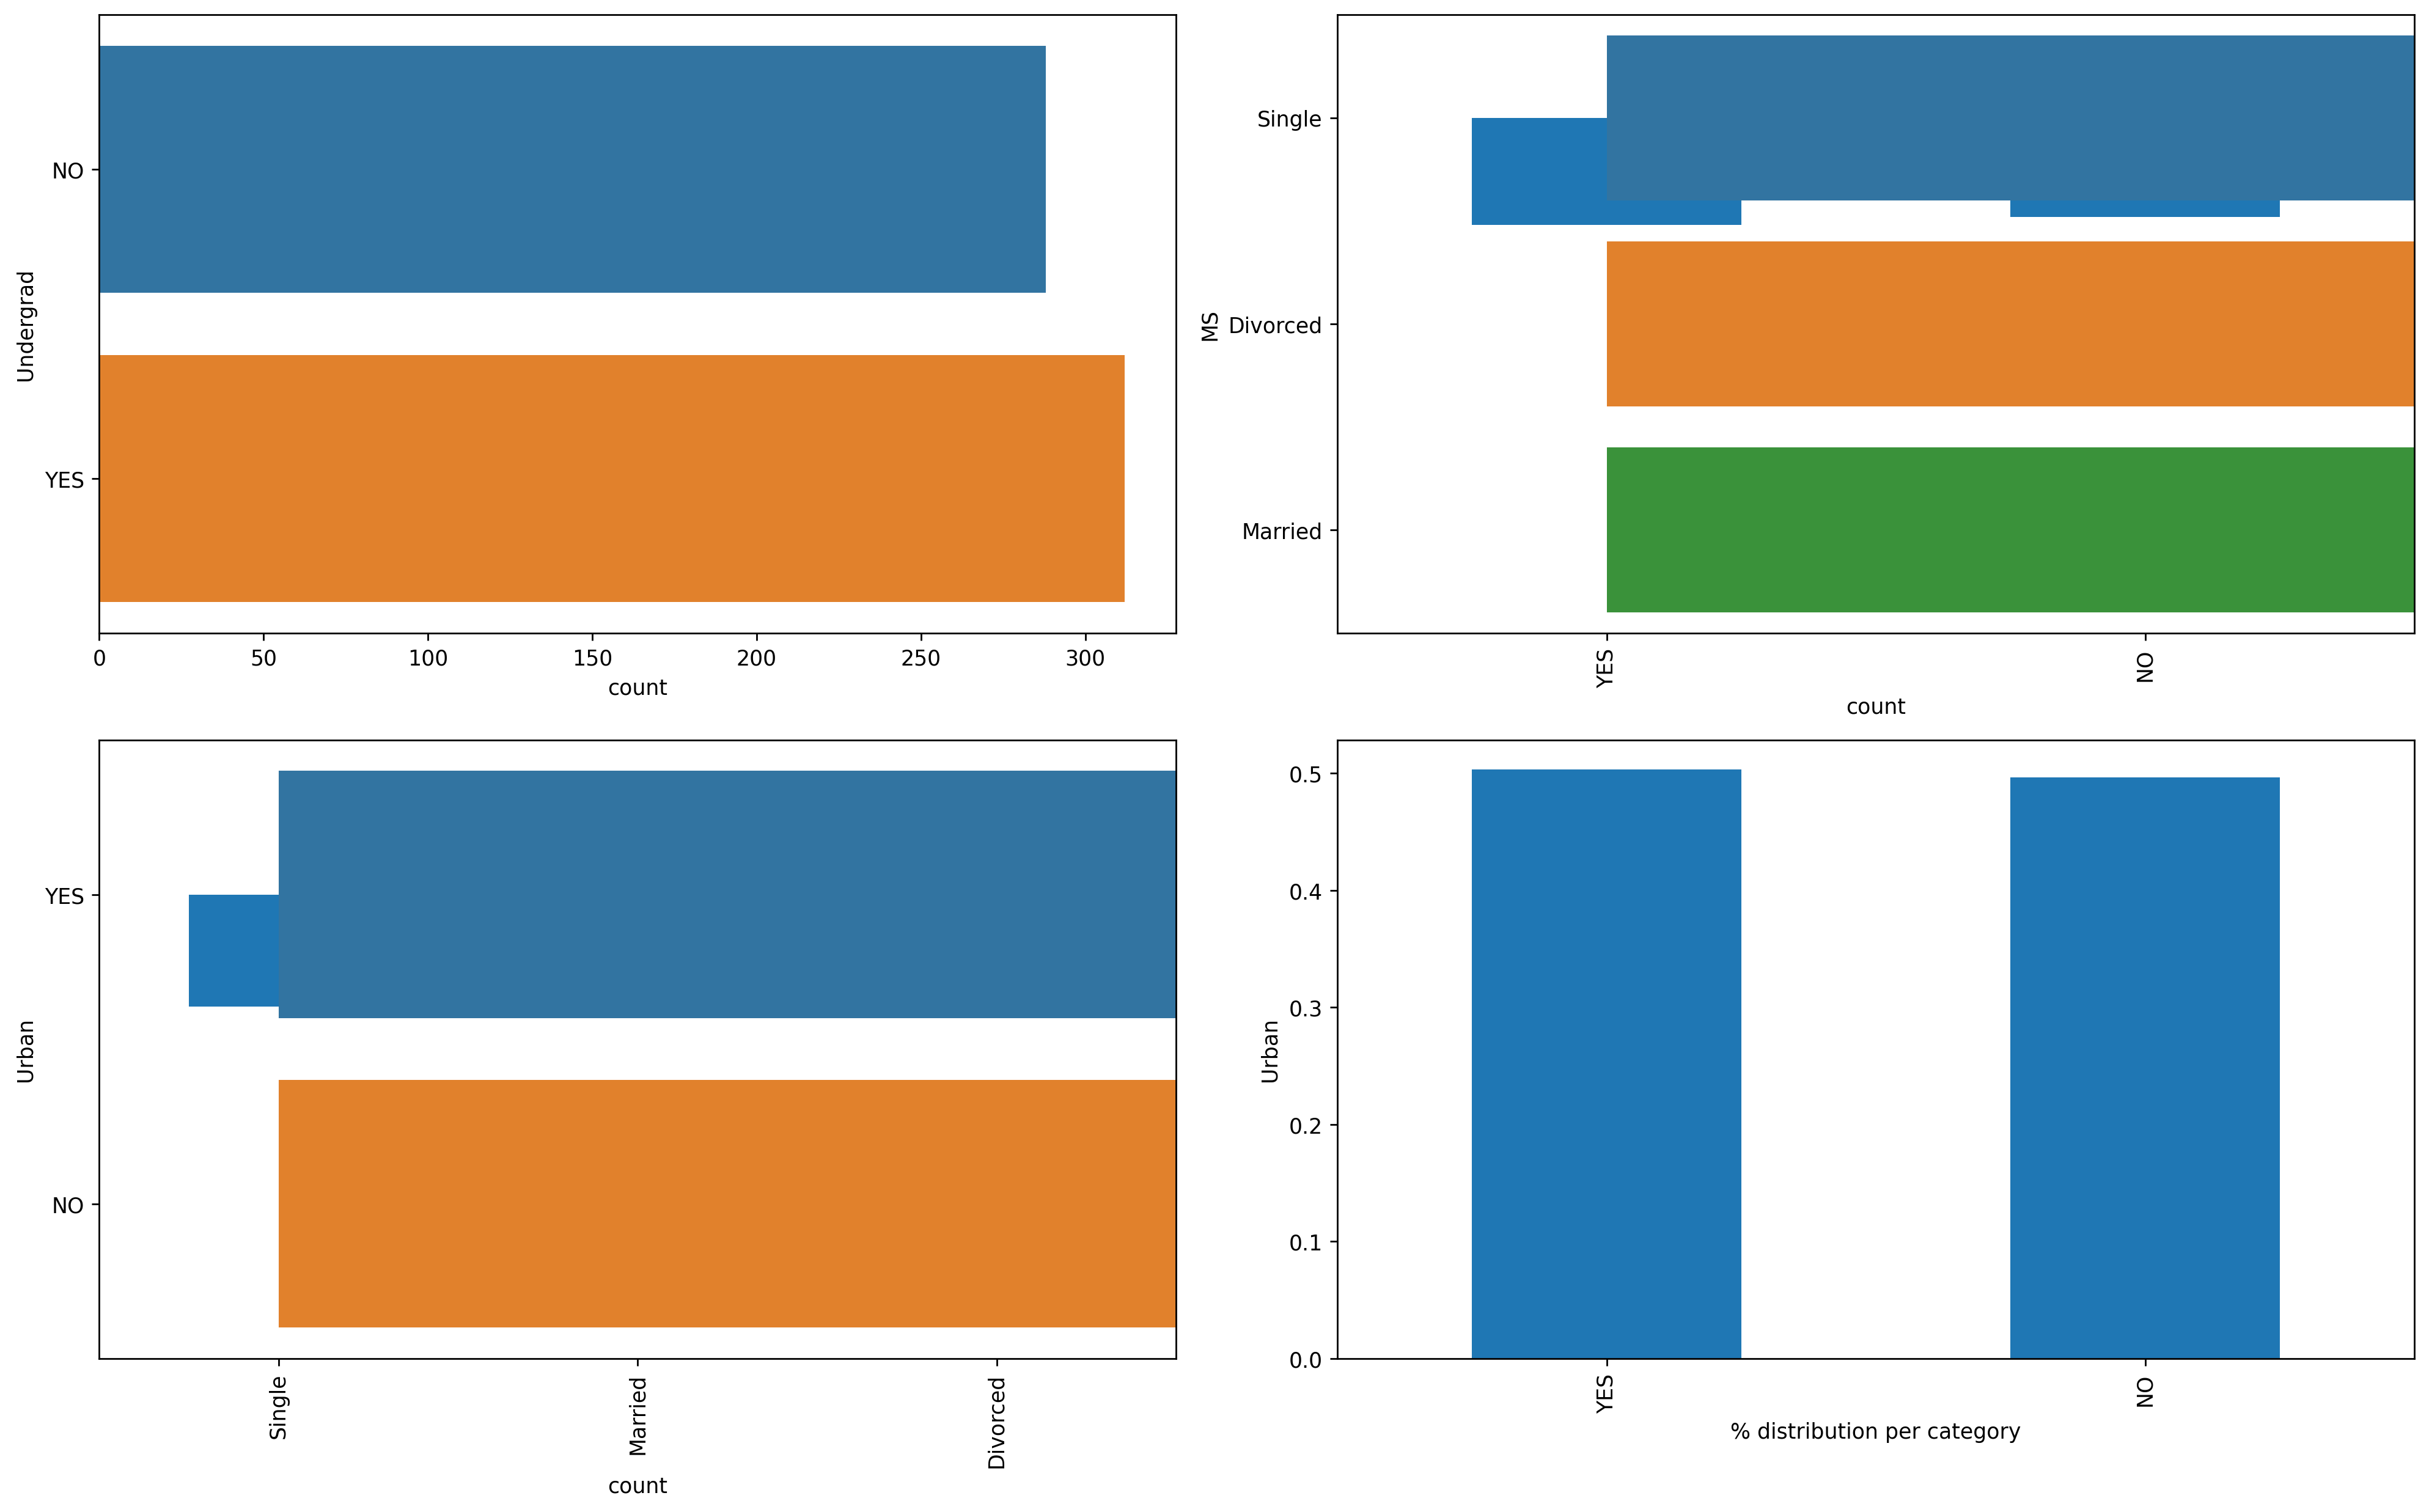

In [65]:
plt.figure(figsize=(16,10))
for i,col in enumerate(['Undergrad', 'MS', 'Urban'],1):
    plt.subplot(2,2,i)
    sns.countplot(data=df,y=col)
    plt.subplot(2,2,i+1)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

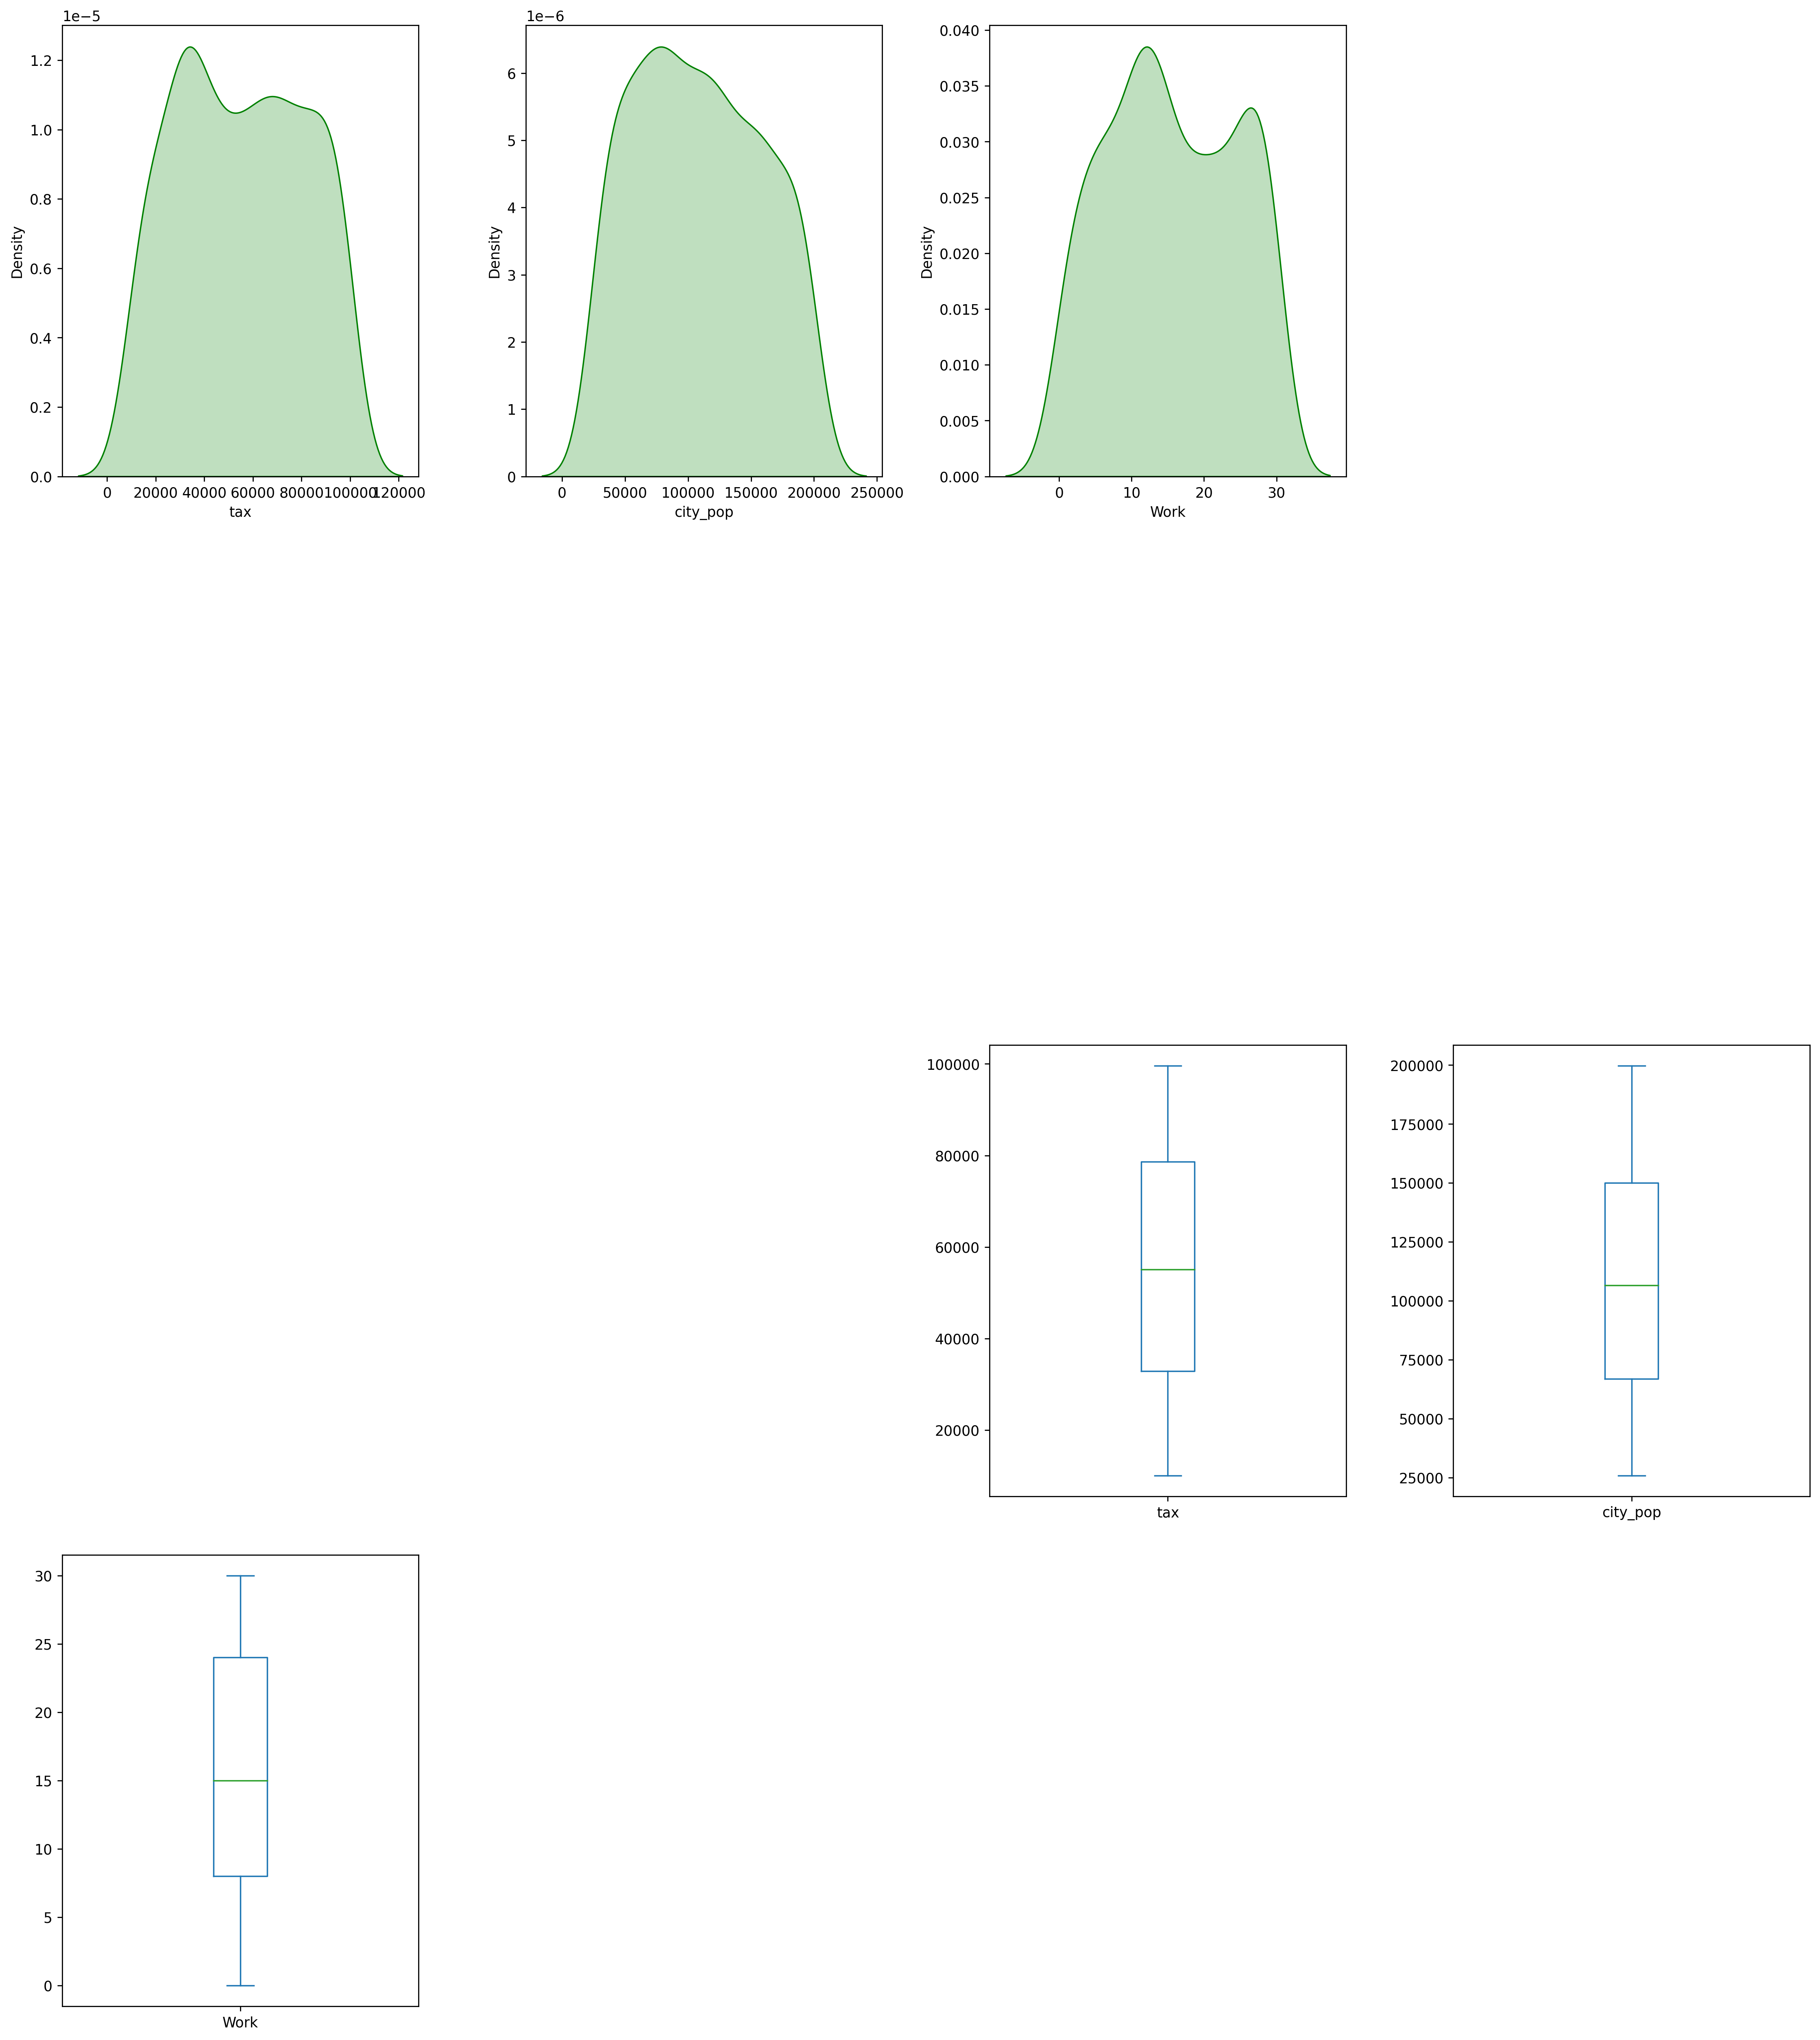

In [66]:
plt.figure(figsize=(18,40))
for i,col in enumerate(['tax','city_pop','Work'],1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()

In [67]:
df['tax']=df.tax.map(lambda x: 'Risky' if x <=30000
                        else 'Good')
df.head(6)

,Undergrad,MS,tax,city_pop,Work,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
5,NO,Divorced,Good,116382,0,NO


In [68]:
df['tax'].nunique()

2

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Undergrad  600 non-null    object
 1   MS         600 non-null    object
 2   tax        600 non-null    object
 3   city_pop   600 non-null    int64 
 4   Work       600 non-null    int64 
 5   Urban      600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [70]:
df.head(6)

,Undergrad,MS,tax,city_pop,Work,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
5,NO,Divorced,Good,116382,0,NO


In [76]:
le= LabelEncoder()

df['Undergrad'] = le.fit_transform(df['Undergrad'])
df['MS'] = le.fit_transform(df['MS'])
df['tax'] = le.fit_transform(df['tax'])
df['Urban'] = le.fit_transform(df['Urban'])

In [77]:
x=df.iloc[:,[0,1,3,4,5]]
y=df['tax']

In [78]:
x

,Undergrad,MS,city_pop,Work,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [79]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: tax, Length: 600, dtype: int64

In [80]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y,train_size=0.75, random_state=143)

In [81]:
rf= RandomForestClassifier(criterion='entropy')
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [83]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       118
           1       0.09      0.03      0.05        32

    accuracy                           0.73       150
   macro avg       0.43      0.47      0.44       150
weighted avg       0.63      0.73      0.67       150



In [84]:
print('Training accuracy: ', rf.score(xtrain,ytrain))
print('Testing Accuracy: ', rf.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.7266666666666667


In [85]:
rf = RandomForestClassifier(criterion='gini')
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [86]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       118
           1       0.08      0.03      0.05        32

    accuracy                           0.72       150
   macro avg       0.43      0.47      0.44       150
weighted avg       0.63      0.72      0.67       150



In [87]:
print('Training accuracy: ', rf.score(xtrain,ytrain))
print('Testing Accuracy: ', rf.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.72


# Hyperparameter Tunning

In [89]:
rf= RandomForestClassifier()

param= {
    'criterion': ['gini','entropy'],
    'max_depth':[1,2,3,4,5,6] 
}

In [90]:
grid= GridSearchCV(RandomForestClassifier(),param)

In [91]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6]})

In [92]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [93]:
rf = RandomForestClassifier(criterion='gini',max_depth=1)

rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [94]:
print('Training accuracy: ', rf.score(xtrain,ytrain))
print('Testing Accuracy: ', rf.score(xtest,ytest))

Training accuracy:  0.7955555555555556
Testing Accuracy:  0.7866666666666666
